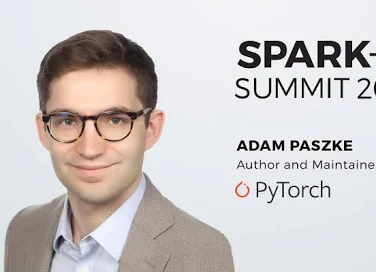
# Adam Paszke


# PyTorch: An Imperative Style, High-Performance Deep Learning Library  
*(arXiv:1912.01703v1)*

# https://arxiv.org/pdf/1912.01703

## Abstract
The paper introduces **PyTorch**, a deep learning framework designed to unify **usability** and **performance**. PyTorch employs an imperative, Python-native execution model with dynamic computation graphs while achieving performance comparable to static-graph frameworks. The work details the system architecture, runtime optimizations, and backend design that enable efficient CPU and GPU execution, and empirically demonstrates competitive performance across widely used deep learning benchmarks.

## Problems

### Usability vs. Performance Trade-off
Prior deep learning frameworks typically favor either developer productivity through dynamic execution or high performance through static graphs, but struggle to provide both simultaneously.

### Limited Flexibility of Static Graphs
Static dataflow graphs restrict dynamic control flow, complicate debugging, and slow experimentation with novel or adaptive model architectures.

### Python Performance Constraints
Python interpreter overhead and the Global Interpreter Lock (GIL) pose challenges for high-throughput execution in large-scale deep learning workloads.

## Proposed Solutions

### Imperative “Define-by-Run” Execution
PyTorch models are expressed as standard Python programs and executed eagerly, enabling full language expressiveness, intuitive debugging, and flexible control flow.

### High-Performance C++ Backend (libtorch)
Performance-critical components—tensor operations, automatic differentiation, and parallel primitives—are implemented in C++ to avoid Python bottlenecks.

### Runtime and Memory Optimizations
The system integrates asynchronous GPU execution, a custom CUDA memory allocator, reference-counted memory management, and multiprocessing support to reduce overhead while preserving flexibility.

## Purpose
The primary goal is to demonstrate that **dynamic, Pythonic deep learning frameworks can achieve state-of-the-art performance**. The paper documents the architectural and implementation choices that allow PyTorch to reconcile ease of use with computational efficiency.

## Methodology

### Design Principles
- Python-first and researcher-centric design  
- Emphasis on productivity and debuggability  
- Pragmatic performance optimizations  
- Preference for simple, composable abstractions  

### System Architecture
- Control flow handled in Python; data flow executed in optimized C++ kernels  
- Reverse-mode automatic differentiation via operator overloading  
- GPU acceleration through asynchronous CUDA streams  

### Evaluation
PyTorch is evaluated on standard models and workloads, including AlexNet, VGG-19, ResNet-50, MobileNet, GNMTv2, and Neural Collaborative Filtering (NCF), and compared against TensorFlow, MXNet, CNTK, and Chainer.

## Results
- PyTorch achieves throughput within approximately **17% of the fastest competing framework** across all benchmarks.  
- Near-optimal GPU utilization is achieved through overlap of CPU scheduling and GPU execution.  
- The custom CUDA memory allocator significantly reduces runtime overhead after warm-up iterations.  
- Adoption metrics show rapid and sustained growth in the research community.

## Conclusions
The paper establishes that an **imperative, dynamic execution model** can coexist with **high-performance deep learning**. By combining Python-level flexibility with a carefully engineered C++ runtime, PyTorch delivers both productivity and efficiency. Its design choices have driven widespread adoption in research, and future directions emphasize further optimization through JIT compilation and enhanced distributed and parallel computing capabilities.


Below is a **focused extraction and explanation of all mathematical and statistical content** in the paper, written from a mathematician’s perspective and limited strictly to concepts that play a functional role in the work.

---

## 1. Tensors and Multidimensional Arrays

### Concept

A **tensor** is a multidimensional array, generalizing scalars (0-D), vectors (1-D), and matrices (2-D).

### Role in the Paper

- Tensors are the fundamental mathematical objects manipulated by PyTorch.  
- All computations (forward evaluation, gradient propagation, GPU kernels) operate on tensors.  
- PyTorch follows the array-based numerical computing paradigm established by NumPy and MATLAB.

### Mathematical View

A tensor can be viewed as an element of the Cartesian product space

$$
\mathbb{R}^{n_1 \times n_2 \times \dots \times n_k}
$$

where each axis corresponds to a semantic dimension such as batch size, channels, or features.

---

## 2. Automatic Differentiation (Autograd)

### Concept

**Automatic differentiation (AD)** computes exact derivatives of functions represented as programs by systematically applying the chain rule.

### Role in the Paper

- PyTorch implements **reverse-mode automatic differentiation**.  
- Gradients are constructed dynamically during execution (“define-by-run”).

### Mathematical Explanation

Given a scalar loss function

$$
L = f(x_1, x_2, \dots, x_n),
$$

reverse-mode AD computes all partial derivatives

$$
\frac{\partial L}{\partial x_i}, \quad i = 1, \dots, n.
$$

This mode is computationally efficient when:
- the output is scalar, and  
- the input dimension is large (the standard setting in deep learning).

---

## 3. Vector–Jacobian Products (VJP)

### Concept

Rather than forming Jacobian matrices explicitly, PyTorch computes **vector–Jacobian products**.

### Mathematical Formulation

Let

- \( f : \mathbb{R}^n \rightarrow \mathbb{R}^m \),
- \( J = \dfrac{\partial f}{\partial x} \) be the Jacobian,
- \( v \in \mathbb{R}^m \).

The quantity computed is

$$
v^\top J.
$$

### Role in the Paper

- This is the core mathematical primitive underlying PyTorch’s autograd engine.  
- It avoids explicit Jacobian construction, reducing both memory usage and computational cost.

---

## 4. Forward-Mode vs. Reverse-Mode Differentiation

### Concepts

- **Forward-mode AD** propagates derivatives from inputs to outputs.  
- **Reverse-mode AD** propagates derivatives from outputs back to inputs.

### Mathematical Trade-off

| Mode        | Computationally Efficient When |
|------------|--------------------------------|
| Forward    | Few inputs, many outputs       |
| Reverse    | Many inputs, single output     |

### Role in the Paper

- PyTorch adopts reverse-mode AD because training typically minimizes a scalar loss.  
- Forward-mode AD is acknowledged but not central to the framework’s design.

---

## 5. Differentiation Through Mutation

### Concept

Differentiation of programs that perform **in-place mutation** on tensors.

### Mathematical Challenge

Mutation violates the assumption of pure functional composition required for naïve application of the chain rule.

### PyTorch’s Mathematical Safeguard

- Each tensor maintains a **version counter**.  
- Gradients are computed only if the dependency graph remains mathematically valid.

### Role in the Paper

- Enables differentiation of realistic imperative programs.  
- Prevents invalid gradient computation caused by overwritten values.

---

## 6. Linear Algebra Operations

### Examples

- Affine transformation:

$$
Y = XW + b
$$

- Convolutions  
- Elementwise nonlinearities (e.g., ReLU, softmax)

### Role in the Paper

- Demonstrates that PyTorch operations correspond to standard linear-algebraic primitives.  
- Confirms that neural network layers are constructed from well-defined mathematical operations.

---

## 7. Gradient-Based Optimization

### Concept

Model parameters are updated using gradient-based optimization algorithms.

### Mathematical Form

A generic gradient descent update is

$$
\theta_{t+1} = \theta_t - \eta \nabla_\theta L,
$$

where \( \eta \) is the learning rate.

### Role in the Paper

- Optimizers (e.g., Adam) rely directly on gradients produced by autograd.  
- Optimization is implemented as ordinary Python code operating on tensors.

---

## 8. Asynchronous Execution and Scheduling (Implicit Mathematics)

### Concept

CPU scheduling and GPU execution are overlapped asynchronously.

### Mathematical Interpretation

This corresponds to **pipeline parallelism**, which improves throughput without altering the underlying numerical computation.

### Role in the Paper

- Ensures high hardware utilization while preserving numerical correctness.

---

## 9. Memory Management and Reference Counting (Quantitative Aspect)

### Concept

Tensors are deallocated immediately when their reference count reaches zero.

### Mathematical Relevance

- Prevents unnecessary memory growth, which otherwise constrains feasible batch sizes and tensor dimensions.  
- Enables large-scale numerical optimization problems to remain computationally tractable.

---

## 10. Benchmark Metrics (Statistical Content)

### Metrics Used

- Throughput measures such as:
  - images per second,
  - tokens per second,
  - samples per second.

### Statistical Interpretation

- Performance results are reported as mean values with variability across repeated runs.  
- Comparisons are performed under controlled hardware and software conditions.

### Role in the Paper

- Quantitatively demonstrates that dynamic execution incurs only modest overhead.

---

## 11. Adoption Statistics

### Metric

- Fraction of arXiv papers mentioning PyTorch over time.

### Statistical Role

- Serves as a proxy measure for usability and community adoption.  
- Shows monotonic growth relative to alternative frameworks.

---

## Overall Mathematical Perspective

The paper introduces **no new mathematical theory**. Its contribution lies in:

- Applying established mathematics (tensors, differential calculus, linear algebra, numerical optimization),  
- Embedding these tools in a **dynamic, imperative computational framework**, and  
- Preserving mathematical correctness while improving practical usability.

The novelty is fundamentally **engineering-driven**, yet firmly grounded in classical numerical analysis and multivariate calculus.


## Structured Review of Research Gaps and Contributions

| Key Problem / Research Gap | How This Limited Prior Work | Proposed Solution in This Paper |
|---------------------------|-----------------------------|---------------------------------|
| Trade-off between usability and performance | Static-graph frameworks (e.g., TensorFlow, CNTK) achieved high performance but were difficult to debug, inflexible, and poorly suited to dynamic model structures; dynamic frameworks often sacrificed speed | Introduces PyTorch as an imperative, eager-execution framework that preserves Python flexibility while achieving performance comparable to static-graph systems |
| Rigid static computation graphs | Static graphs constrained control flow (loops, conditionals, recursion), making it difficult to implement novel or adaptive model architectures | Adopts a define-by-run model where computation graphs are built dynamically during execution, fully supporting arbitrary Python control flow |
| Difficulty of debugging deep learning models | Prior frameworks required graph compilation or specialized debugging tools, preventing inspection of intermediate values during execution | Treats models as standard Python programs, enabling direct use of print statements, debuggers, and visualization tools |
| Performance overhead of Python execution | Python’s interpreter overhead and Global Interpreter Lock limited concurrency and throughput in dynamic frameworks | Implements a high-performance C++ core (libtorch) that executes tensor operations, autograd, and parallelism outside the Python interpreter |
| Inefficient gradient computation for dynamic programs | Source-to-source differentiation or graph rewriting was brittle or infeasible in highly dynamic languages | Uses operator overloading with reverse-mode automatic differentiation to compute gradients exactly for arbitrary executed programs |
| Poor GPU utilization in eager frameworks | CPU-side scheduling overhead often prevented full GPU saturation | Employs asynchronous GPU execution via CUDA streams, overlapping CPU control flow with GPU computation |
| GPU memory allocation overhead | Frequent `cudaMalloc` / `cudaFree` calls caused synchronization stalls and degraded performance | Introduces a custom CUDA caching allocator optimized for deep learning memory usage patterns |
| Limited extensibility of framework components | Many frameworks imposed rigid APIs, making it difficult to replace or customize core components | Designs all subsystems (autograd, data loading, optimizers) to be modular and user-replaceable |
| Inefficient multiprocessing for tensor data | Standard Python multiprocessing incurred heavy serialization overhead for large arrays | Extends Python multiprocessing to share tensor memory efficiently, including transparent CUDA tensor sharing |
| Excessive memory usage due to garbage collection | Garbage-collected systems delayed memory reclamation, limiting feasible batch sizes on GPUs | Uses reference counting to deterministically free tensor memory as soon as it becomes unused |
| Lack of empirical validation of eager execution performance | Dynamic frameworks were often assumed to be inherently slower without rigorous benchmarking | Provides systematic benchmarks showing PyTorch performance within approximately $$17\%$$ of the fastest competing frameworks |
| Unclear real-world adoption impact | Usability claims were often anecdotal or qualitative | Quantifies community adoption via arXiv mentions, demonstrating rapid and sustained growth |

---

## Summary Insight

The paper systematically addresses long-standing tensions between **flexibility**, **debuggability**, and **performance** in deep learning frameworks. Its core contribution is not a new learning algorithm, but a **runtime and system design** that enables mathematically standard deep learning methods to be expressed dynamically—via imperative programs and reverse-mode automatic differentiation—without incurring prohibitive computational cost.


## Related Work Extracted from the Reference Section

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---------|------|-------|-------|--------------------------|
| Jia et al. | 2014 | *Caffe: Convolutional Architecture for Fast Feature Embedding* | arXiv | Representative static-graph deep learning framework; illustrates performance-focused but less flexible design compared to PyTorch |
| Seide & Agarwal | 2016 | *CNTK: Microsoft’s Open-Source Deep-Learning Toolkit* | KDD | Example of a high-performance static graph framework that trades usability and flexibility for efficiency |
| Abadi et al. | 2015 | *TensorFlow: Large-Scale Machine Learning on Heterogeneous Systems* | Software (Google) | Canonical static dataflow framework; serves as a primary comparison point for PyTorch’s eager execution model |
| Theano Development Team | 2016 | *Theano: A Python Framework for Fast Computation of Mathematical Expressions* | arXiv | Early symbolic graph-based framework influencing later static computation graph designs |
| Tokui et al. | 2015 | *Chainer: A Next-Generation Open Source Framework for Deep Learning* | NIPS Workshop | Pioneer of define-by-run (dynamic) execution; directly motivates PyTorch’s imperative programming model |
| Neubig et al. | 2017 | *DyNet: The Dynamic Neural Network Toolkit* | arXiv | Dynamic neural network framework highlighting benefits of eager execution but limited by performance and ecosystem |
| Collobert et al. | 2002 | *Torch: A Modular Machine Learning Software Library* | Technical Report (IDiap) | Predecessor framework emphasizing modularity and numerical computing; influences PyTorch’s tensor abstraction |
| Collobert et al. | 2011 | *Torch7: A MATLAB-like Environment for Machine Learning* | NeurIPS | Lua-based deep learning framework whose performance and modular design informed PyTorch’s C++ backend |
| Baydin et al. | 2017 | *Automatic Differentiation in Machine Learning: A Survey* | JMLR | Provides theoretical background for automatic differentiation used by PyTorch’s autograd system |
| Maclaurin | 2016 | *Modeling, Inference and Optimization with Composable Differentiable Procedures* | PhD Thesis (Harvard) | Influences composable, operator-overloading-based differentiation strategies |
| Johnson et al. | 2018 | *JAX* | GitHub / Software | Modern NumPy-based automatic differentiation system; represents parallel evolution of dynamic AD frameworks |
| Innes et al. | 2018 | *Flux.jl* | GitHub / Software | Julia-based dynamic deep learning framework; supports the feasibility of imperative ML systems |
| Chetlur et al. | 2014 | *cuDNN: Efficient Primitives for Deep Learning* | arXiv | Provides GPU-optimized kernels leveraged by PyTorch for high-performance execution |
| Lavin & Gray | 2016 | *Fast Algorithms for Convolutional Neural Networks* | CVPR | Underpins optimized convolution implementations used by modern deep learning frameworks |
| Recht et al. | 2011 | *Hogwild: A Lock-Free Approach to Parallelizing SGD* | NeurIPS | Motivates PyTorch’s multiprocessing and shared-memory parallel training capabilities |

---

## Synthesis

The related work spans three principal categories:

1. **Static computation graph frameworks**, emphasizing performance and compiler-based optimization but limiting flexibility and debuggability.  
2. **Dynamic, define-by-run systems**, prioritizing expressiveness and ease of experimentation but historically constrained by performance and tooling.  
3. **Foundational numerical and systems research**, including automatic differentiation theory, GPU-accelerated linear algebra, and parallel optimization methods.

PyTorch positions itself as a unifying system that combines the **imperative flexibility** of dynamic frameworks with the **computational efficiency** traditionally associated with static-graph systems. This synthesis is enabled by advances in reverse-mode automatic differentiation, optimized C++ runtimes, and high-performance GPU libraries, rather than by the introduction of new learning algorithms.
